# P05: CNN on CIFAR 10

The objectives of this practical are:

* Do more practice on CNN
* Monitor the training history
* Learn how to save a complete model
* Learn how to save the weights and architectures separately
* Learn how to create checkpoint at different point of your training

Reference: 
* Data augmentation: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
* Checkpoint: https://machinelearningmastery.com/check-point-deep-learning-models-keras/

In [1]:
# set up to automatically reload module
%load_ext autoreload
%autoreload 2    
    
import keras
#from lib.cifar10 import load_data
from lib.cifar10 import get_CIFAR10_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np

Using TensorFlow backend.


### Load the CIFAR dataset

The following code loads the CIFAR10. The preprocessing involved are:
* center the data
* perform one-hot embedding of the output label y of all samples

Here, in addition to the training set (`X_train`, `y_train`) and testing set (`X_test`, `y_test`), we also sample 1000 samples from the training set for development and save them into (`X_dev`, `y_dev`).

In [2]:
# The data, shuffled and split between train and test sets:
# X_train, y_train, X_test, y_test = load_data (r'.\data\cifar-10-batches-py')

X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data(r'.\data\cifar-10-batches-py', 
                 num_training  = 5000, 
                 num_validation = 500,
                 num_test      = 500, 
                 num_dev      = 1000,
                 b_center   = True, 
                 b_normalize = True,
                 b_flatten  = False,
                 b_add_bias = False,
                 b_y_to_categorical = True)

print('x_train shape:', X_train.shape, 'y_train shape:', y_train.shape)
print('x_val shape:', X_val.shape, 'y_val shape:', y_val.shape)
print('x_dev shape:', X_dev.shape, 'y_dev shape:', y_dev.shape)
print('x_test shape:', X_test.shape, 'y_test shape:', y_test.shape)

num_classes = 10

Load .\data\cifar-10-batches-py\data_batch_1
Load .\data\cifar-10-batches-py\data_batch_2
Load .\data\cifar-10-batches-py\data_batch_3
Load .\data\cifar-10-batches-py\data_batch_4
Load .\data\cifar-10-batches-py\data_batch_5
Load .\data\cifar-10-batches-py\test_batch
x_train shape: (5000, 32, 32, 3) y_train shape: (5000, 10)
x_val shape: (500, 32, 32, 3) y_val shape: (500, 10)
x_dev shape: (1000, 32, 32, 3) y_dev shape: (1000, 10)
x_test shape: (500, 32, 32, 3) y_test shape: (500, 10)


# <u> Part 1: Build your CNN model for CIFAR10</u>

Your first task is to build the following CNN structure. Remember that for the first layer, you must set the input's shape and the channel position. For the remaining layers, this would infer this automatically.

1. 2D Convolution (#filters = 32, filter size = 3x3, pad to maintain shape, stride = 1, channel position = last)    
2. ReLU Activation  
3. 2D Convolution (#filters = 32, filter size = 3x3, no padding, stride = 1)
4. ReLU Activation                  
5. Max Pooling (filter size = 2x2, stride = filter size, no padding)        
6. 2D Convolution (#filters = 64, filter size = 3x3, pad to maintain shape, stride = 1)           
7. ReLU Activation              
8. 2D Convolution (#filters = 64, filter size = 3x3, no padding, stride = 1)            
9. ReLU Activation
10. MaxPooling2 (filter size = 2x2, stride = filter size, no padding)                 
11. Flatten                       
12. Dense (#neurons = 512)                
13. ReLU Activation                       
14. Dense (#neurons = num_classes)                
15. Softmax Activation   

## Build the ConvNet

**Exercise 1: Build your ConvNet**

First, manually calculate the expected size of the output of each layer. You can use this size to verify if your implementation is correct or not. Then, write the code to implement the ConvNet. Verify your the summary of each layer reported by Keras against with your own calculation.`

1. 2D Convolution:    \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
2. ReLU Activation    \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
3. 2D Convolution:    \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
4. ReLU Activation:   \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
5. Max Pooling:       \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
6. 2D Convolution:    \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
7. ReLU Activation:   \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
8. 2D Convolution:    \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
9. ReLU Activaiton:   \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
10. MaxPooling2:      \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
11. Flatten:          \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_               
12. Dense:            \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_       
13. ReLU:             \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_               
14. Dense:            \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_             
15. Softmax:          \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_        

In [3]:
# Your code here
model = Sequential()
model.add(Conv2D(32, (3, 3),
                padding='same',
                strides=1,
                input_shape=(32, 32, 3),
                data_format='channels_last',
                activation='relu'))
model.add(Conv2D(32, (3, 3),
                padding='valid',
                strides=1,
                activation='relu'))
model.add(MaxPooling2D(
                pool_size=(2, 2),
                strides=2,
                padding='valid'))
model.add(Conv2D(64, (3, 3),
                padding='same',
                strides=1,
                activation='relu'))
model.add(Conv2D(64, (3, 3),
                padding='valid',
                strides=1,
                activation='relu'))
model.add(MaxPooling2D(
                pool_size=(2, 2),
                strides=2,
                padding='valid'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

**Exercise 2: Configure the learning process (Compile)**
*  Use the adam optimizer (set the learning rate to 0.0001 and decay to 1e-6)
*  Use the 'accuracy' metric
*  Use the 'categorical_crossentropy' loss function for optimization

In [5]:
# Your code here
from keras import optimizers
adam_optimizer = optimizers.Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

## Train the model

**Exercise 3: Train the model**
* For this round, use the development set (`X_dev`, `y_dev`)
* Split the development set: 700 samples for training and 300 samples for validation (set the `validation_split` parameter in `.fit`)
* Run for 25 epochs and batch size of 32
* Shuffle the data before each epoch 

In [6]:
# Your code here
history = model.fit(X_dev, y_dev, validation_split=0.3, epochs=25, batch_size=32, shuffle=True, verbose=2)

Train on 700 samples, validate on 300 samples
Epoch 1/25
 - 30s - loss: 2.2850 - acc: 0.1429 - val_loss: 2.2691 - val_acc: 0.1633
Epoch 2/25
 - 1s - loss: 2.2328 - acc: 0.2000 - val_loss: 2.2149 - val_acc: 0.1933
Epoch 3/25
 - 1s - loss: 2.1381 - acc: 0.2486 - val_loss: 2.1236 - val_acc: 0.2433
Epoch 4/25
 - 1s - loss: 2.0279 - acc: 0.2914 - val_loss: 2.0330 - val_acc: 0.2700
Epoch 5/25
 - 1s - loss: 1.9062 - acc: 0.3000 - val_loss: 1.9790 - val_acc: 0.2867
Epoch 6/25
 - 1s - loss: 1.8567 - acc: 0.3443 - val_loss: 1.9306 - val_acc: 0.3433
Epoch 7/25
 - 1s - loss: 1.7724 - acc: 0.3671 - val_loss: 1.8998 - val_acc: 0.3633
Epoch 8/25
 - 1s - loss: 1.7156 - acc: 0.4014 - val_loss: 1.8796 - val_acc: 0.3600
Epoch 9/25
 - 1s - loss: 1.6721 - acc: 0.3971 - val_loss: 1.9267 - val_acc: 0.3367
Epoch 10/25
 - 1s - loss: 1.6353 - acc: 0.4229 - val_loss: 1.8713 - val_acc: 0.3367
Epoch 11/25
 - 1s - loss: 1.5682 - acc: 0.4571 - val_loss: 1.8354 - val_acc: 0.3667
Epoch 12/25
 - 1s - loss: 1.5115 - acc

## Debug the training process

The result (training loss, validation loss and training accuracy, validation accuracy) are captured in `history`. The following code plots two graphs, one for the loss and the other for the accuracy. For each graph, the performance for the validation and training dataset are contrasted to each other.

You can use the dataset to explore the dataset.

**Exercise #3: Plotting loss and accuracy curves**

The code for this exercise has been given for you. Your task is to 
1. Review the variable `history`. # code to review 'history'. What is the type? What are the data included in 'history'? Are each of the data the numpy array or simply a list?
2. Review the code in `plot_training_curves`. Probably when you have more time, you can try to re-implement this code from scratch without referring to it. 

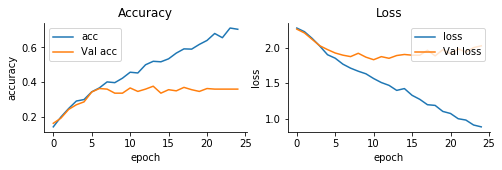

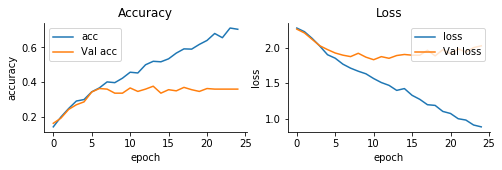

In [8]:
from lib.display import plot_training_curves
plot_training_curves(history.history)

In exercise 3, you will find that the gap between the validation and training accuracies grow wider (validation accuracy grows stagnant while training accuracy grows better). This is a sign of overfitting happening.

## Overcoming overfitting

**Exercise 4: Overcoming overfitting in our model**

Your task now is to remove the overfitting. There are many techniques to reduce overfitting. One way to do this is to add dropout layers. Here, we insert three additional dropout layers (layer 6, 12 and 16) to regularize the network.

1. 2D Convolution (#filters = 32, filter size = 3x3, pad to maintain shape, stride = 1, channel position = last)    
2. ReLU Activation  
3. 2D Convolution (#filters = 32, filter size = 3x3, no padding, stride = 1)
4. ReLU Activation                  
5. Max Pooling (filter size = 2x2, stride = filter size, no padding)                 
6. **Dropout (Set drop out rate to 0.25)**
7. 2D Convolution (#filters = 64, filter size = 3x3, pad to maintain shape, stride = 1)           
8. ReLU Activation              
9. 2D Convolution (#filters = 64, filter size = 3x3, no padding, stride = 1)            
10. ReLU Activation
11. MaxPooling2 (filter size = 2x2, stride = filter size, no padding)                 
12. **Dropout (Set dropout rate to 0.25)**                   
13. Flatten                       
14. Dense (#neurons = 512)                
15. ReLU Activation                       
16. **Dropout (Set dropout rate to 0.5)**
15. Dense (#neurons = num_classes)                
16. Softmax Activation   

In [9]:
def build_model():

    # Build the ConvNet: Copy your answer from exercise 1 above and make the necessary modification
    
    # Configure the learning: Copy your answer from exercise 2 above
    model = Sequential()
    model.add(Conv2D(32, (3, 3),
                    padding='same',
                    strides=1,
                    input_shape=(32, 32, 3),
                    data_format='channels_last',
                    activation='relu'))
    model.add(Conv2D(32, (3, 3),
                    padding='valid',
                    strides=1,
                    activation='relu'))
    model.add(MaxPooling2D(
                    pool_size=(2, 2),
                    strides=2,
                    padding='valid'))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3),
                    padding='same',
                    strides=1,
                    activation='relu'))
    model.add(Conv2D(64, (3, 3),
                    padding='valid',
                    strides=1,
                    activation='relu'))
    model.add(MaxPooling2D(
                    pool_size=(2, 2),
                    strides=2,
                    padding='valid'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    from keras import optimizers
    adam_optimizer = optimizers.Adam(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    
    return model

In [10]:
model = build_model()

Now, let's train our model and visualize our result.

In [11]:
# Train the model. Copy and paste your answer from above
history = model.fit(X_dev, y_dev,
                validation_split = 0.3,
                batch_size=32,
                epochs=25,
                shuffle=True)

Train on 700 samples, validate on 300 samples
Epoch 1/25
700/700 [==============================] - 1s 2ms/step - loss: 2.3035 - acc: 0.0900 - val_loss: 2.2915 - val_acc: 0.1433
Epoch 2/25
700/700 [==============================] - 1s 847us/step - loss: 2.2844 - acc: 0.1400 - val_loss: 2.2802 - val_acc: 0.1467
Epoch 3/25
700/700 [==============================] - 1s 852us/step - loss: 2.2672 - acc: 0.1557 - val_loss: 2.2606 - val_acc: 0.1533
Epoch 4/25
700/700 [==============================] - 1s 866us/step - loss: 2.2318 - acc: 0.1914 - val_loss: 2.2169 - val_acc: 0.1600
Epoch 5/25
700/700 [==============================] - 1s 853us/step - loss: 2.1754 - acc: 0.2257 - val_loss: 2.1536 - val_acc: 0.2567
Epoch 6/25
700/700 [==============================] - 1s 851us/step - loss: 2.0944 - acc: 0.2371 - val_loss: 2.0757 - val_acc: 0.2700
Epoch 7/25
700/700 [==============================] - 1s 867us/step - loss: 2.0380 - acc: 0.2486 - val_loss: 2.0140 - val_acc: 0.2667
Epoch 8/25
700/700

If you have added the three layers correctly, you should see that the gap between the training and validation set should be small now.

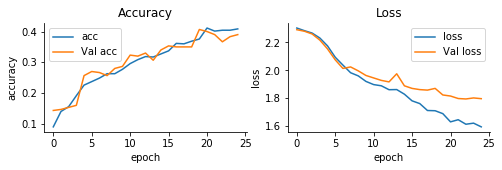

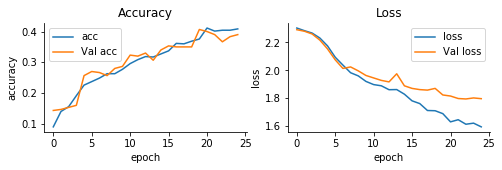

In [12]:
from lib.display import plot_training_curves
plot_training_curves(history.history)

## Evaluate our model on the test set

Now let's evaluate our model on the test set. The accuracy would be low (~0.15) since we are only training using the development set.

In [13]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 2.90609109879
Test accuracy: 0.134000000119


# <u>Part 2: Saving your model</u>

Now that we have a model, you may want to save it to be used later. We can either save the whole model or save the architecture and the weights separately. 

### (A) Saving the whole model (architecture + weight + optimizer state)

You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.

Notes:
* It is not recommended to use pickle or cPickle to save a Keras model.
* Note that you will first need to install HDF5 and the Python library h5py, which do not come bundled with Keras.

Reference: https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

**Saving the model**

The following code saves the whole model to disk for later use. Go and find `'full_mode.h5'`. Take note at the size of the file.

In [14]:
save_dir = os.path.join(os.getcwd(), 'P05_saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [15]:
model_file = os.path.join(save_dir, 'full_model.h5')

In [16]:
model.save(model_file)
print('Saved trained model parameters at {:s}'.format(model_file))

Saved trained model parameters at C:\Users\user\Desktop\UCCD3074\P05_saved_models\full_model.h5


**Loading the saved model**

You can then use keras.models.load_model(filepath) to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).

To test if we manage to import time, let's delete our model and then reload it from scratch.

In [17]:
del model         # delete model. Previous model has been eliminated from the memory

In [18]:
from keras.models import load_model
loaded_model = load_model(model_file)

**Using the loaded model**

When we use the model to evaluate on the test set, we will get the same performance as before.

In [19]:
# Score trained model.
scores = loaded_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

500/500 [==============================] - 0s 399us/step
Test loss: 2.90609109879
Test accuracy: 0.134000000119


When you train using the loaded model, it does not train from scratch and will continue from where it started. You can confirm this is indeed the case by looking at the accuracy of the first epoch. 

In [20]:
history = loaded_model.fit(X_dev, y_dev,
                validation_split = 0.3,
                batch_size=32,
                epochs=2,
                shuffle=True)

Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [==============================] - 1s 965us/step - loss: 1.5757 - acc: 0.4286 - val_loss: 1.8050 - val_acc: 0.3633
Epoch 2/2
700/700 [==============================] - 1s 875us/step - loss: 1.5581 - acc: 0.4157 - val_loss: 1.7867 - val_acc: 0.3667


## (B) Saving the architecture and weights separately

Sometimes, you may want to choose to save the weights at different iterations. Since the architecture remains the same, it is a waste of space to save the whole model. So, you may want to save the architecture into a single file and the weights at different iterations to different weight files.

In Keras, you can save the architecture as a `.json` file and the parameters as the `.h5` file.

** Save the architecture of the network**

To do this, you conver the model to a json string using `.to_jason` and then save the json string to the disk. Go and find `'network.h5'`. Take note at the size of the file.

In [21]:
network_filename  = os.path.join(save_dir, 'network.json')

# save as JSON
json_string = loaded_model.to_json()
with open(network_filename, "w") as json_file:
    json_file.write(json_string)

**Save the model of the network**

Next, we save the weights of the network using the command `.save_weights`. Go and find `'params.h5'`. Take note at the size of the file.

In [22]:
param_filename = os.path.join (save_dir, 'params.h5')

# serialize weights to HDF5
loaded_model.save_weights(param_filename)

**Loading the architecture**

Before we continue, first we delete the previous model. 

In [23]:
del loaded_model

The following loads the architecture file from the disk. To do this, we read the jason string from our `.json` file. Then, we convert the json string into a Sequential model using the Keras function `model_from_json`.

In [24]:
from keras.models import model_from_json

# load json and create model
json_file = open(network_filename, 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model2 = model_from_json(loaded_model_json)
print("Loaded architecture from disk")

Loaded architecture from disk


**Loading the weights**

Once we have our model, we can load the weights into our model usin gthe command `.load_weights`.

In [25]:
# load weights into new model
loaded_model2.load_weights(param_filename)
print("Loaded weights from disk")

Loaded weights from disk


**Configure the learning process**

We have to configure the learning manually since the circuits related to the trainer is not included in the architecture file.

In [27]:
# evaluate loaded model on test data
# initiate RMSprop optimizer
opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)

# Let's train the model using adam
loaded_model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

**Using the loaded model**

Now we are ready to use our model.

Again, we evaluate it on our test set. We should get roughly the same accuracy value as before.

In [28]:
scores = loaded_model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

500/500 [==============================] - 0s 681us/step
Test loss: 3.18890283966
Test accuracy: 0.132000000119


You can also continue training. You should also see that it would continue to train from where you left.

In [29]:
history = loaded_model2.fit(X_dev, y_dev,
                validation_split = 0.3,
                batch_size=32,
                epochs=2,
                shuffle=True)

Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [==============================] - 1s 2ms/step - loss: 1.5421 - acc: 0.4486 - val_loss: 1.7831 - val_acc: 0.3933
Epoch 2/2
700/700 [==============================] - 1s 839us/step - loss: 1.5293 - acc: 0.4386 - val_loss: 1.7709 - val_acc: 0.3867


# <u> Part 3: Checkpointing Neural Network Models </u>

Rather than manually saving the weights in your code, Keras provides the tools for you to do this automatically throughout the training process. This is known as **checkpointing** your application.

Checkpointing is a fault tolerance technique for long running processes. It saves a snapshot of the state of the system at a certain predefined period. This means that you can stop your training and continue from where you let at a later time. When 
problem occurs and your system rebooted, not all is lost. 

The checkpoint may be used directly, or used as the starting point for a new run, picking up where it left off.

When training deep learning models, the checkpoint is the weights of the model. These weights can be used to make predictions as is, or used as the basis for ongoing training.

** `ModelCheckpoint`**

The Keras library provides a checkpointing capability by a callback API. The `ModelCheckpoint` callback class allows you to define where to checkpoint the model weights, how the file should named and under what circumstances to make a checkpoint of the model.

The API allows you to specify which metric to monitor, such as loss or accuracy on the training or validation dataset. You can specify whether to look for an improvement in maximizing or minimizing the score. Finally, the filename that you use to store the weights can include variables like the epoch number or metric.

### Checkpointing during training

In [30]:
from keras.callbacks import ModelCheckpoint

First, we need to create a `ModelCheckpoint` object called `checkpoint`. It is used to configure the checkpoints. `checkpoint` will be passed to the training process when calling the `.fit()` function on the model.

The parameters when declaring a `ModelCheckpoint` object is as follows:
* `filepath`: string, path to save the model file.
* `monitor`: quantity to monitor.
* `verbose`: verbosity mode, 0 or 1.
* `save_best_only`: if save_best_only=True, the latest best model according to the quantity monitored will not be overwritten.
* `mode`: one of {auto, min, max}. If save_best_only=True, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min, etc. In auto mode, the direction is automatically inferred from the name of the monitored quantity.
* `save_weights_only`: if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)).
* `period`: Interval (number of epochs) between checkpoints.

**Keeping the best model only (one file for each checkpoint)**

In the following, we will configure `checkpoint` such that it saves the network weights only when there is an improvement in classification accuracy on the validation dataset (monitor=’val_acc’ and mode=’max’). 

The weights are stored in a file that includes (1) the epoch number and (2) the score in the filename.

In [31]:
filepath  = os.path.join(save_dir, "model-{epoch:02d}-{val_acc:.2f}.hdf5")

checkpoint = ModelCheckpoint(
            filepath, 
            monitor='val_acc', 
            verbose=1, 
            save_best_only=True, 
            save_weights_only=False,
            mode='max',
            period = 1)

In [32]:
validation_split = 0.3
epochs = 2
model = build_model()
history = model.fit(X_dev, y_dev,
                  validation_split =validation_split,
                  batch_size=256,
                  epochs=epochs,
                  callbacks = [checkpoint],
                  shuffle=True,
                  verbose = 2)

Train on 700 samples, validate on 300 samples
Epoch 1/2
Epoch 00001: val_acc improved from -inf to 0.14667, saving model to C:\Users\user\Desktop\UCCD3074\P05_saved_models\model-01-0.15.hdf5
 - 2s - loss: 2.3086 - acc: 0.1157 - val_loss: 2.3010 - val_acc: 0.1467
Epoch 2/2
Epoch 00002: val_acc did not improve
 - 0s - loss: 2.2933 - acc: 0.1357 - val_loss: 2.2980 - val_acc: 0.1367


**Keeping the best model only (save to same file)**

A simpler check-point strategy is to save the model weights to the same file, if and only if the validation accuracy improves.

This can be done easily using the same code from above and changing the output filename to be fixed (not include score or epoch information).

In this case, model weights are written to the file “weights.best.hdf5” only if the classification accuracy of the model on the validation dataset improves over the best seen so far.

In [33]:
filepath  = os.path.join(save_dir, "best_model.hdf5")

checkpoint = ModelCheckpoint(
            filepath, 
            monitor='val_acc', 
            verbose=1, 
            save_best_only=True, 
            save_weights_only=False,
            mode='max',
            period = 1)   # checkpoint every 1 epoch

In [34]:
validation_split = 0.3
epochs = 2
model = build_model()
history = model.fit(X_dev, y_dev,
                  validation_split =validation_split,
                  batch_size=256,
                  epochs=epochs,
                  callbacks = [checkpoint],
                  shuffle=True,
                  verbose = 2)

Train on 700 samples, validate on 300 samples
Epoch 1/2
Epoch 00001: val_acc improved from -inf to 0.10667, saving model to C:\Users\user\Desktop\UCCD3074\P05_saved_models\best_model.hdf5
 - 2s - loss: 2.3091 - acc: 0.0914 - val_loss: 2.3006 - val_acc: 0.1067
Epoch 2/2
Epoch 00002: val_acc improved from 0.10667 to 0.11000, saving model to C:\Users\user\Desktop\UCCD3074\P05_saved_models\best_model.hdf5
 - 0s - loss: 2.2963 - acc: 0.1186 - val_loss: 2.2962 - val_acc: 0.1100


In [35]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

500/500 [==============================] - 0s 263us/step
Test loss: 2.30128372574
Test accuracy: 0.0960000000298


***Loading and continuing from a saved checkpoint***

Now that you have seen how to checkpoint your deep learning models during training, you need to review how to load and use a checkpointed model.

The checkpoint only includes the model weights. It assumes you know the network structure. This too can be serialize to file in JSON or YAML format.

In the example below, the model structure is known and the best weights are loaded from the previous experiment, stored in the working directory in the weights.best.hdf5 file.

The model is then used to make predictions on the entire dataset.

In [36]:
del model

In [37]:
# Score trained model.
model_file  = os.path.join(save_dir, 'best_model.hdf5')

from keras.models import load_model
model = load_model(model_file)

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

500/500 [==============================] - 0s 570us/step
Test loss: 2.30128372574
Test accuracy: 0.0960000000298


**Exercise 5: Optimize the CIFAR10 classifier**

* Build the best CIFAR10 classifier using the training set.
* Since training may take time, use checkpoints to train it whenever you can.
* You may also consider perform data augmentation to improve your result.